## 

## Stochastic RSI  : Case Study with Microsoft Stocks

The Stochastic RSI (StochRSI) is an indicator used in technical analysis  created by applying the Stochastic oscillator formula to a set of relative strength index (RSI) values rather than to standard price data. Using RSI values within the Stochastic formula gives an idea of whether the current RSI value is overbought or oversold.

The Stochastic RSI range between 0 and 1.

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security's historical performance rather than a generalized analysis of price change.

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf

In [58]:
today=datetime.today().strftime("%Y-%m-%d")

For this study I will choose Microsoft Stocks to trade : 

In [59]:
data=yf.download("MSFT", start="2021-01-01", end=today)

[*********************100%***********************]  1 of 1 completed


As I will need it for the following, I define an exponential moving average function:

In [86]:
def EMA(data, period=20, column="Close"):
    return data[column].ewm(span=period, adjust=False).mean()

I will defining a stochastic RSI function as well. The window will be 14 days for that little case study.

In [87]:
def StochRSI(data, window, column):
    
    delta = data[column].diff(1)
    delta = delta.dropna()
    positive= delta.copy()
    negative=delta.copy()
    positive[positive<0]=0
    negative[negative>0]=0
    data['+']= positive
    data["-"]= negative
    AVG_Gain=EMA(data, period=14, column="+")
    AVG_Loss=abs(EMA(data, period=14, column="-"))
    RS=AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    
    stockRSI=(RSI-RSI.rolling(window).min())/(RSI.rolling(window).max()-RSI.rolling(window).min())
    return stockRSI

    
    
    

In [88]:
data['StochRSI']=StochRSI(data=data, window=14, column="Close")


The authors of the Stochastic RSI indicator - Tushard Chande and Stanley Kroll - explain that often regular RSI indicator would trade in between 20 and 80.  
Following that idea, we will use the threshold of 0.80 to indicate that we are in an overselling trend and 0.20 for an overbought trend :

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871., 18901., 18932., 18962.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 2520x720 with 0 Axes>

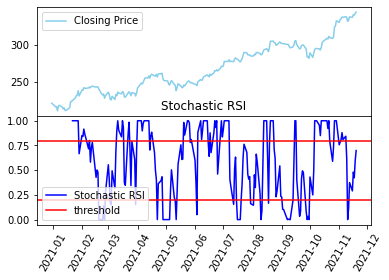

In [89]:
plt.figure(figsize=(35,10))
fig,(ax1,ax2)=plt.subplots(nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)
plt.title("Stochastic RSI")
ax1.plot(data.index, data["Close"], color="skyblue")
ax2.plot(data.index, data["StochRSI"], color="b") 
ax2.axhline(0.20, color="r")
ax2.axhline(0.80, color="r")
ax1.legend(labels=["Closing Price"])
ax2.legend(labels=["Stochastic RSI", "threshold"])
plt.xticks(rotation=60 )


In order to have a clearer output of the trends and thus of the decisions I have to take with this trading strategy, I will create a signal function. It will show me, in the graph, when do I have to take a buy/sell decision.

In [90]:
def signal(data, high, low):
    buy=[]
    sell=[]
    
    for i in range(len(data["StochRSI"])):
        if data["StochRSI"][i]>high:
            buy.append(np.nan)
            sell.append(data["Close"][i])
        elif data["StochRSI"][i]<low:
            buy.append(data["Close"][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return buy, sell
            

I will fix the thresholds to 0.8 and 0.2 as discussed before:

In [91]:
df=data.copy()
df["Buy"]=signal(df,0.8,0.2)[0]
df["Sell"]=signal(df,0.8,0.2)[1]
df

,Open,High,Low,Close,Adj Close,Volume,+,-,StochRSI,Buy,Sell
Date,,,,,,,,,,,
2020-12-31,221.699997,223.000000,219.679993,222.419998,220.571106,20942100,NaN,NaN,NaN,NaN,NaN
2021-01-04,222.529999,223.000000,214.809998,217.690002,215.880432,37130100,0.000000,-4.729996,NaN,NaN,NaN
2021-01-05,217.259995,218.520004,215.699997,217.899994,216.088669,23823000,0.209991,0.000000,NaN,NaN,NaN
2021-01-06,212.169998,216.490005,211.940002,212.250000,210.485626,35930700,0.000000,-5.649994,NaN,NaN,NaN
2021-01-07,214.039993,219.339996,213.710007,218.289993,216.475433,27694500,6.039993,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,337.540009,337.880005,334.029999,336.070007,335.456299,16723000,0.000000,-0.649994,0.290031,NaN,NaN
2021-11-16,335.679993,340.670013,335.510010,339.510010,338.890015,20886800,3.440002,0.000000,0.480165,NaN,NaN
2021-11-17,338.940002,342.190002,338.000000,339.119995,339.119995,19053400,0.000000,-0.390015,0.422989,NaN,NaN


Let's take a look on the buy and sell signals:

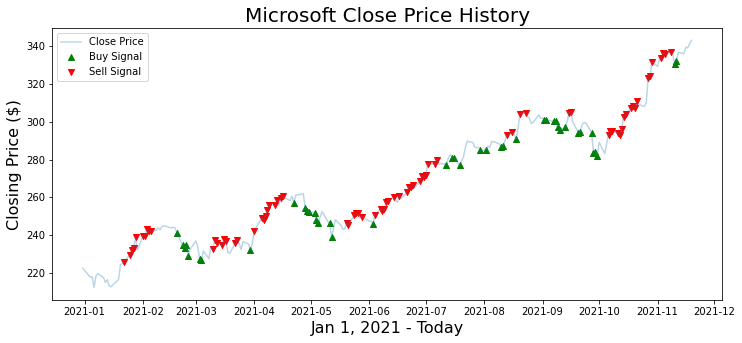

In [92]:
plt.figure(figsize=(12,5))
plt.plot(df["Close"], alpha =0.3)
plt.scatter(data.index, df["Buy"], color="green", marker="^", alpha=1)
plt.scatter(data.index, df["Sell"], color="red", marker="v", alpha=1)
plt.title("Microsoft Close Price History", fontsize=20)
plt.xlabel("Jan 1, 2021 - Today", fontsize=16)
plt.ylabel("Closing Price ($)",fontsize=16)
plt.legend(labels=["Close Price","Buy Signal","Sell Signal"],loc="upper left")

plt.show()